In [2]:
import numpy as np

# Python lists
ls = [[1, 2], [3, 4]]
print(ls)
ls[0][1]

# Poor performance (relative to what?), also mixed types are allowed


[[1, 2], [3, 4]]


2

Numpy implements these things behind the scenes in c which give better performance

In [6]:
arr = np.array([[1, 2], [3, 4]])
print(arr)

#type safety, this doesn't work:
array[0][1] = 'hello'

[[1 2]
 [3 4]]
[[5 2]
 [3 4]]


In [7]:
#By default its an int array:
arr[0][0] = 5.6
print(arr)

[[5 2]
 [3 4]]


Some performance comparison

In [ ]:
ls = list(range(100000))
arr = np.arange(100000)

In [11]:
%%timeit
s = 0
for i in range(100000):
  s += i * i

s

100 loops, best of 3: 8.72 ms per loop


In [13]:
# Super fast!
%%timeit
s2 = 0
s2 += np.sum(arr*arr)
s2

1000 loops, best of 3: 222 µs per loop


# Pandas and Seaborn
 
## Pandas 
for example - group by
**Works in memory**, fast, but limited for large sizes
Can read from many sources, like clipboard, csv, json, sql source (query with some connection), parquet and many more.

Doesn't fit large data sets (in memory)

## Seaborn
view the data in a graphical way

In [17]:
import pandas as pd
import seaborn as sb

# Upload any csv to Files
dataframe = pd.read_csv("./pandas/addresses.csv") # Table
# Info including size in memory
dataframe.info()
dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   John               4 non-null      object
 1   Doe                5 non-null      object
 2   120 jefferson st.  4 non-null      object
 3   Riverside          5 non-null      object
 4    NJ                5 non-null      object
 5    08075             5 non-null      int64 
dtypes: int64(1), object(5)
memory usage: 368.0+ bytes


,John,Doe,120 jefferson st.,Riverside,NJ,08075
0,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
1,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
2,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
3,NaN,Blankman,NaN,SomeTown,SD,298
4,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


In [21]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/goodby/csv/master/example/user.csv')
dataframe

,1,alice,alice@example.com
0,2,bob,bob@example.com
1,3,carol,carol@eample.com


In [22]:
dataframe = pd.read_csv("./pandas/addresses.csv") # Table
dataframe.head() # first few records
dataframe.info() # Field types, number of record of each field, null count (missing data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   John               4 non-null      object
 1   Doe                5 non-null      object
 2   120 jefferson st.  4 non-null      object
 3   Riverside          5 non-null      object
 4    NJ                5 non-null      object
 5    08075             5 non-null      int64 
dtypes: int64(1), object(5)
memory usage: 368.0+ bytes


Using info, we can learn how many records are missing in the dataset
You get the record count, column count, number of non-null count.
data typs (object is string)

Good for data preperation


In [23]:
# Get stats info for the table with one call, avg, min, max, std div, etc.
dataframe.describe()

,08075
count,5.000000
mean,21769.800000
std,39059.209909
min,123.000000
25%,298.000000
50%,8075.000000
75%,9119.000000
max,91234.000000


When completing missing data, it might be useful to fill missing data with avg. but only if the std div is small.

In [26]:
arr1 = np.array([100, 100, 0, 0])
arr2 = np.array([48, 48, 52, 52])
print(arr1.mean())
print(arr1.std()) 

print(arr2.mean())
print(arr2.std())


50.0
50.0
50.0
2.0


It's important to find values that doesn't make sense, for example with max, min etc. and to eliminate them if they are errors, or if they simply doesn't make sense with the general data, so called "outliers".
for example in a list of apartment prices, we have one or two multi million apts, which doesn't coinside with the rest of the data.

You can then query the data for these outliers:

In [ ]:
dataframe.query("income > 40000") # Example from different data

In [38]:
df3 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/riii/master/data/house-prices.csv')
# And also, you can describe by column and property (e.g. max)
df3.describe().Price.max() # Example from different data

Home          Price         SqFt    Offers
Bedrooms Bathrooms                                                  
2        2           67.961538  114603.846154  1839.615385  2.038462
         3           71.250000  119525.000000  1995.000000  2.750000
3        2           60.222222  116450.000000  1926.944444  2.777778
         3           70.193548  136512.903226  2072.903226  2.838710
4        2           45.200000  136930.000000  1993.000000  2.100000
         3           66.157895  163389.473684  2220.000000  2.736842
5        3           34.000000  139600.000000  2280.000000  4.000000
         4          117.000000  199500.000000  2290.000000  1.000000

In [39]:
# Some examples
df3.Bedrooms.unique()

array([2, 4, 3, 5])

In [40]:
# group my country
# df3.groupby(['Country']).mean()
df3.groupby(['Bedrooms']).mean()


,Home,Price,SqFt,Bathrooms,Offers
Bedrooms,,,,,
2,68.400000,115260.000000,1860.333333,2.133333,2.133333
3,64.835821,125732.835821,1994.477612,2.462687,2.805970
4,58.931034,154265.517241,2141.724138,2.655172,2.517241
5,75.500000,169550.000000,2285.000000,3.500000,2.500000


In [41]:
# group my country AND gender
# df3.groupby(['Country', 'Gender']).mean()
df3.groupby(['Bedrooms', 'Bathrooms']).mean()

Home          Price         SqFt    Offers
Bedrooms Bathrooms                                                  
2        2           67.961538  114603.846154  1839.615385  2.038462
         3           71.250000  119525.000000  1995.000000  2.750000
3        2           60.222222  116450.000000  1926.944444  2.777778
         3           70.193548  136512.903226  2072.903226  2.838710
4        2           45.200000  136930.000000  1993.000000  2.100000
         3           66.157895  163389.473684  2220.000000  2.736842
5        3           34.000000  139600.000000  2280.000000  4.000000
         4          117.000000  199500.000000  2290.000000  1.000000

Pandas cheat sheet:
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

We want to find correlation between datums.
for example, if weight is correlatd to height, then we will be able to fill the data more easily. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


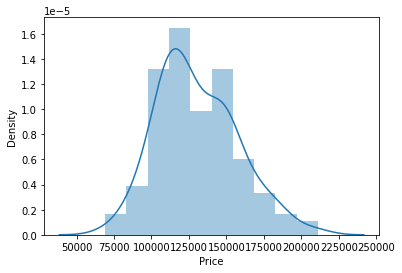

In [42]:
# Need other data
sb.distplot(df3.Price)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


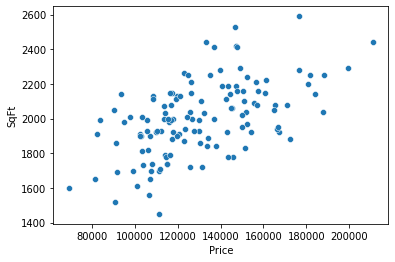

In [43]:
# Show weight by height, to find correlation
sb.scatterplot(df3.Price, df3.SqFt)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


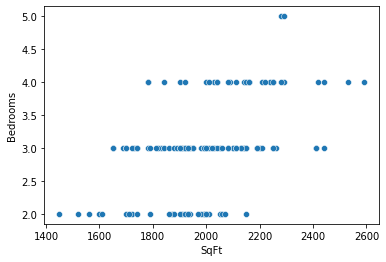

In [45]:
# Apt. rooms vs apt area
sb.scatterplot(df3.SqFt, df3.Bedrooms)

We're looking for any data correlation we can find.
seaborn pairplot is a very nice way of doing that

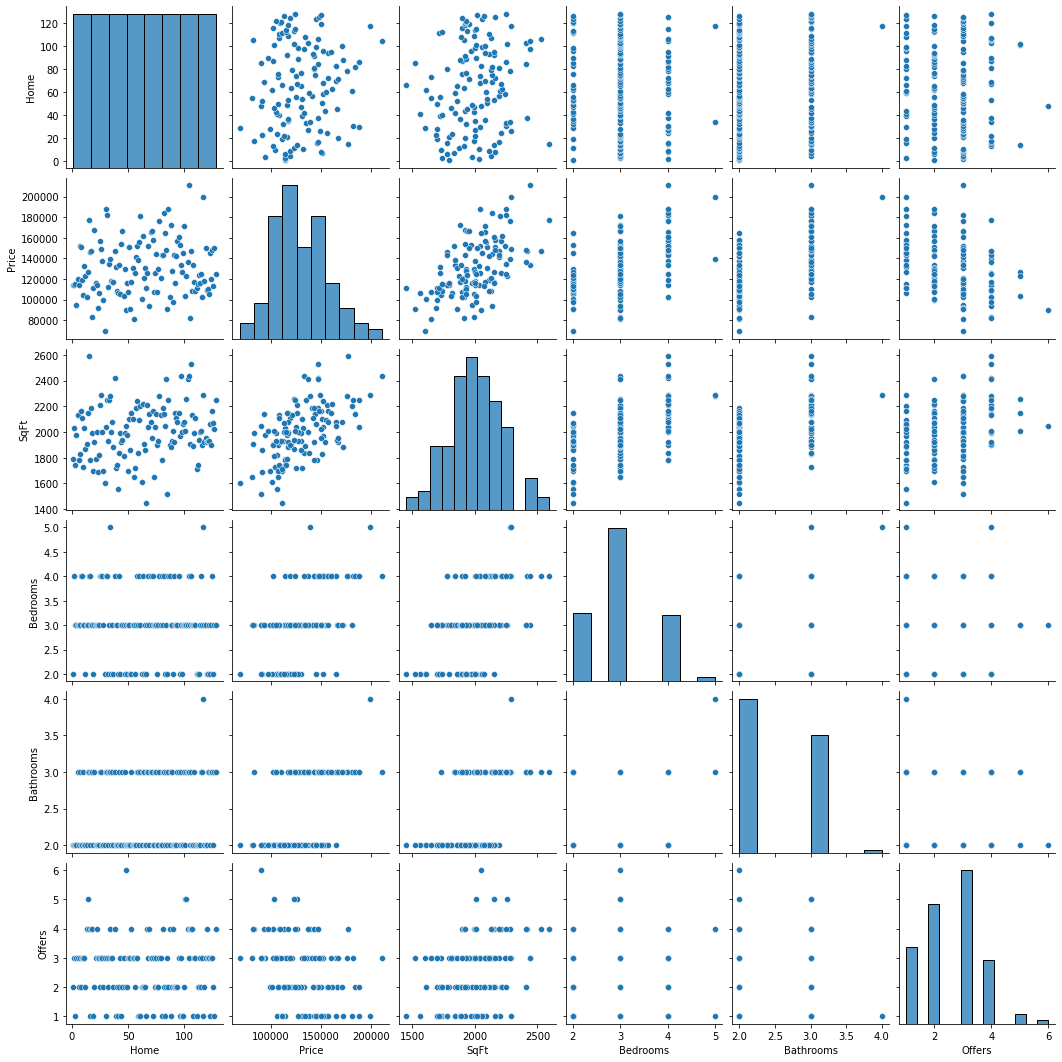

In [46]:
# Create platterplots for any two features, to better visualize relationships
sb.pairplot(df3)

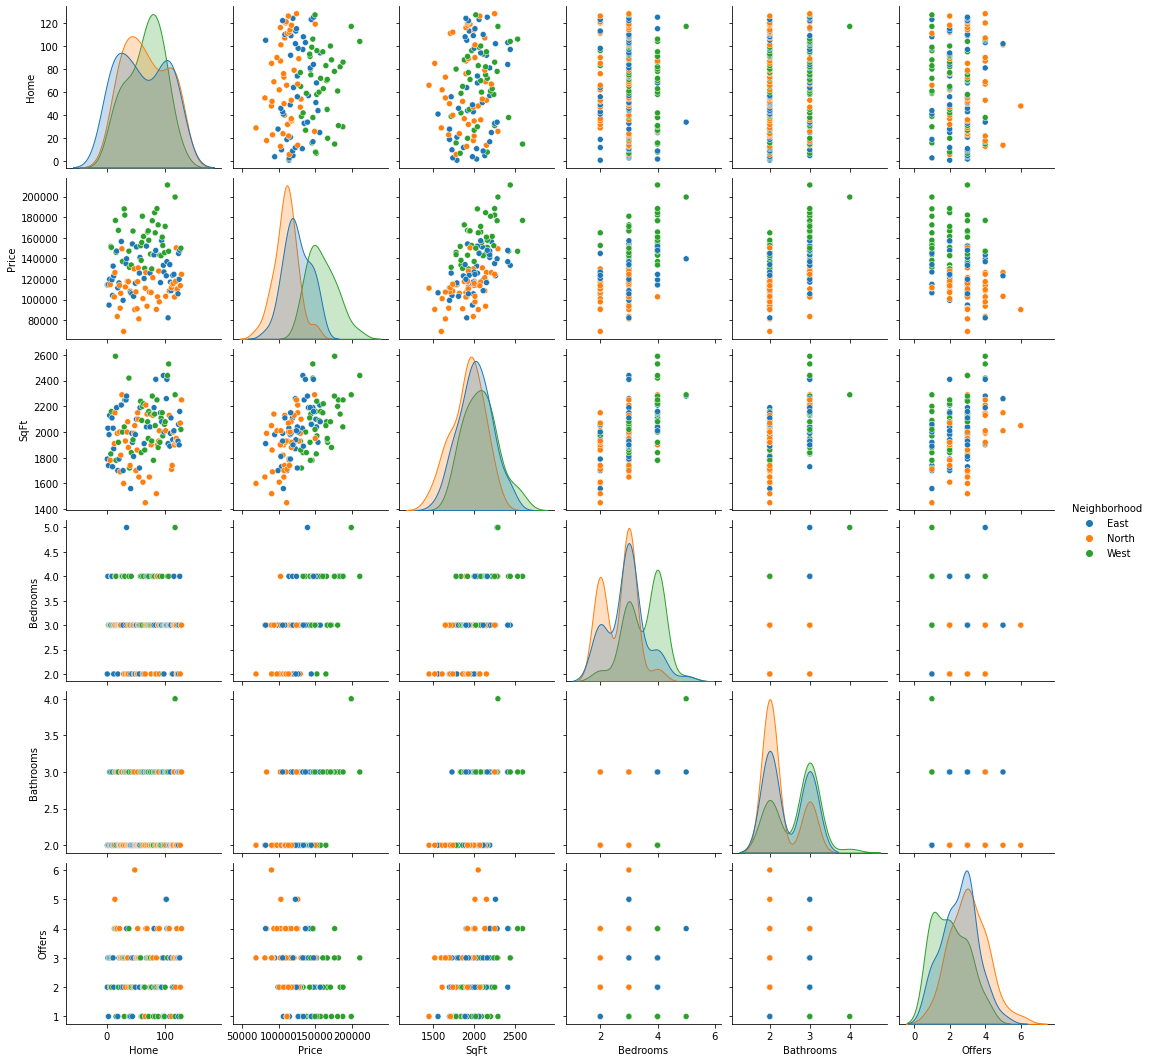

In [47]:
# Different color by gender
sb.pairplot(df3, hue='Neighborhood')

In [48]:
# We need to be able to test for correlation in code
# Correlation - -1: 1 how correlated are two features (-1 reverse correlated, 1 correlated, 0 not linear correlated)
df3.corr()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
Home,1.000000,0.108190,0.168553,-0.068568,0.127694,-0.053597
Price,0.108190,1.000000,0.552982,0.525926,0.523258,-0.313636
SqFt,0.168553,0.552982,1.000000,0.483807,0.522745,0.336923
Bedrooms,-0.068568,0.525926,0.483807,1.000000,0.414556,0.114271
Bathrooms,0.127694,0.523258,0.522745,0.414556,1.000000,0.143793
Offers,-0.053597,-0.313636,0.336923,0.114271,0.143793,1.000000


In [50]:
print(df3.corr().Price.Bedrooms)
print(df3.corr().Price.SqFt)

0.5259260576398529
0.5529822425554838


# Data Prep

In [ ]:
# Assuming we want to drop some items, we can for example:
# Delete rows
ls = df.query("incmoe >= 45000")
df.drop(ls, inplace=True). # If not inplace, then it returns a copy
df.describe()

In [ ]:
# Delete columns - let's say we have irrelevant columns
# Deleting columns require the axis param=1
df.drop(['Name', 'Country']).axis=1 # Returns a copy
df.drop(['Name', 'Country'], axis=1, inplace=True) # In place update

In [ ]:
# we can also update an entire column
# For example, anyone older than 12, update to max (12)
df.query("Age > 12")
df.loc[df.Age > 12, 'Age'] = 12

In [ ]:
# Changing named types to numbers so we can work with it
df.gender.replace({'M': 1, 'F': 2}, inplace=True)
df.head()

Data prep example

In [ ]:
X = df.drop(['avg'], axis=1)
Y = df.avg

In [51]:
from sklearn.model_selection import train_test_split
# From docs:
# IMPORTANT: Records will be selected randomly to avoid picking biased data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import sklearn.linear_model as sl
# All models are classes (start with Capital letter)

# We'll start with a simple model, usually we will test a few model and use the fittest
# Models have many "hyper params", linear is simple
# Fine tuning the params can be done with some tools (later)
model = sl.LinearRegression()
# model = sl.LinearRegression(fit_inter..=False) # Force to pass at 0,0 if all coeffients are zero

model.fit(X_train, y_train)

In [ ]:
# Test the model
y_pred = model.predict(X_test)
print(y_pred_)

In [ ]:
# For a very simple dataset, we can compare the results, just as a naive exmaple
# We will later see how to actually compare results
print(ytest)

## Actually test the results

In [ ]:
# Get the score for the test dataset
# Usually this isn't well documneted, but this is an exception: 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
# This explains the score in this case. usually you need to go and learn this stuff
model.score(X_test, y_test)


Amilliorating the data

In [ ]:
# We can try to drop data etc and check the score
# We can try to drop the gender and see if it affects the score and how (better/worse)
X = df.drop(['avg', 'gen'], axis=1)

* random_state is the seed of the random
this is so that we will have the same results all the time (same random results).

* we can also try different models. 

In [ ]:
smodel.coef_ # list of the model coefficients
model.intercept_ # the free coefficient

In [ ]:
# We can for example, add a column for income per person which maybe fits better
# Than total income and family size
# This require understanding of the business
df.['income_per_person'] = df['income'] / df['family'] # Check syntax
# And we can perhaps also drop the income and family columns


What do we want as an actual result? that a user/customer can make sense of?

It's varies between regression and classification.

* M.A.E - [mean absolute error](https://www.google.com/search?q=mean+absolute+error&sxsrf=ALeKk00WKjQLksxMKpEH9cd3ZQq2pibiXA:1609679653167&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjhgrf_6__tAhUImRQKHd5PDYIQ_AUoAXoECBgQAw&biw=1920&bih=945#imgrc=TmktvX3cTGhTYM)



In [ ]:
# We can scatterplot between the test and pred
sb.scatterplot(y_test, y_pred)

In [ ]:
# Show the diff on a graph
sb.distplot(y_test - y_pred)

In [ ]:
# Returns a list of the diffs =, but abs, and then avg. this is the MAE
(y_test - y_pred).abs().mean()
# The avg error for the results.

In [ ]:
# But we should actually use SciPy
import sklearn.metrics as mt
mt.mean_absolute_error(y_Test, y_pred) # This have many scores we can use

The problem with MAE, that it's not very good with big errors (its not sensitive to exterme results) 

Another option to solve this is M.S.E - mean squared error. so the error is squared and as much as the error is bigger it will have more effect.
We are more sensitive to big errors.

If there's a big diff between the two, then we are probably sensitive to extreme results.


In [ ]:
mt.mean_squared_error(y_test, y_pred) ** 0.5 # We want to root sq of the result
